<div class="alert alert-info"
     style="background-color:#008a79; color:white; padding:0px 10px; border-radius:10px;">
    <h1 style='margin:10px 5px'>International Recipes: Predictive Model</h1>
</div>

### Content:
1. Load the Data
  - Import libraries
  - Load data
   
   
2. Exploratory Data Analysis
  - Plotting Distribution and % of Recipes by Cuisine
  - Plotting Pie Chart of number of Recipes by Cuisine
  - Plotting Distribution of number of Ingredients by recipe


3. Data Preprocessing
  - Multibinarizer
  - Encoding Label variable
  - Plotting Ingredients Distribution by Cuisine
  - Plotting all Ingredients by Cuisine


4. Data Preparation for Machine Learning
  - Preparing DataFrame 
  - Train Test split
 
 
5. Model Building
  - Models Fitting
  - Model Evaluation

  
6. Improve Model
  - Hyperparameters Tuning
  - Save the Final Model

### 1. Load the data

In [69]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import time
import pickle

In [2]:
# Load data
df = pd.read_json('/Users/dser/Downloads/recipes.json.zip')

In [3]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [4]:
# Set index
df.set_index('id', inplace=True)
df.sort_index(ascending=True, inplace=True)

### 2. Exploratory Data Analysis

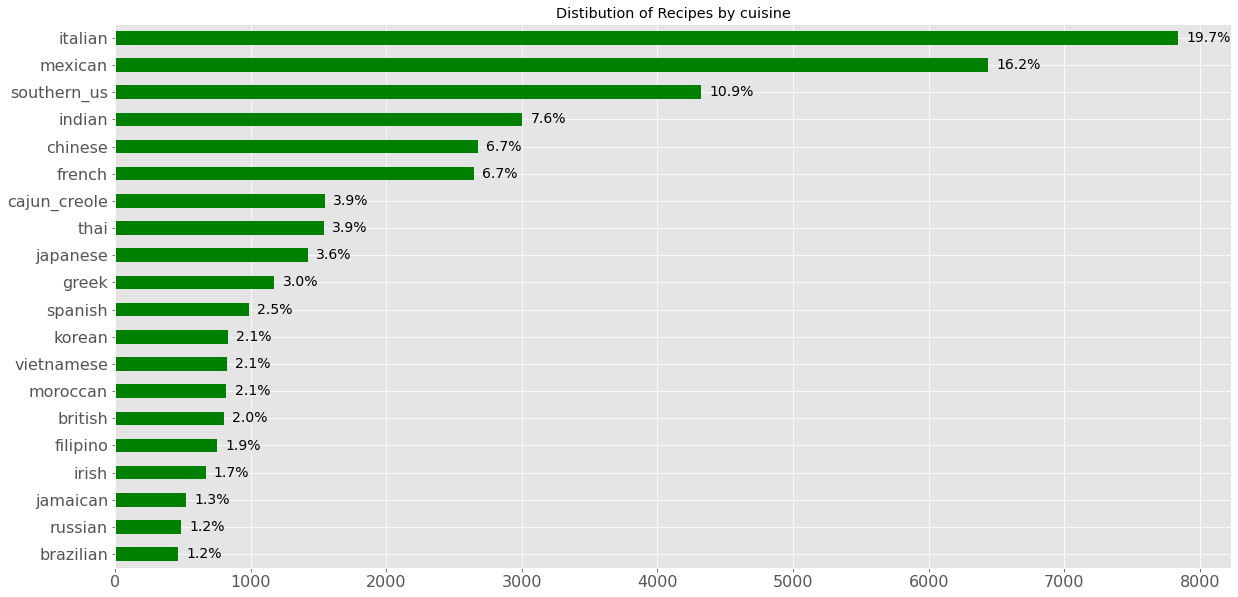

In [5]:
# Plotting distribution and % of recipes by cuisine
cuisine = df['cuisine'].value_counts().sort_values()

ax = cuisine.plot(kind='barh', fontsize=16, title='Distibution of Recipes by cuisine', color='green', figsize=(20,10));

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+60, i.get_y()+.1, str(round((i.get_width()/total)*100, 1))+'%', fontsize=14)


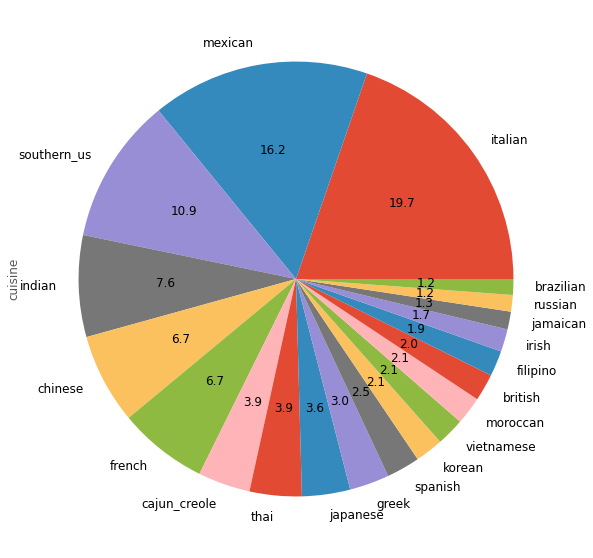

In [6]:
# Pie chart of the number of recipes by cuisine
cuisine.sort_values(ascending=False).plot(kind='pie',x='cuisine',y='perct', fontsize=12, autopct='%.1f', figsize=(20,10));

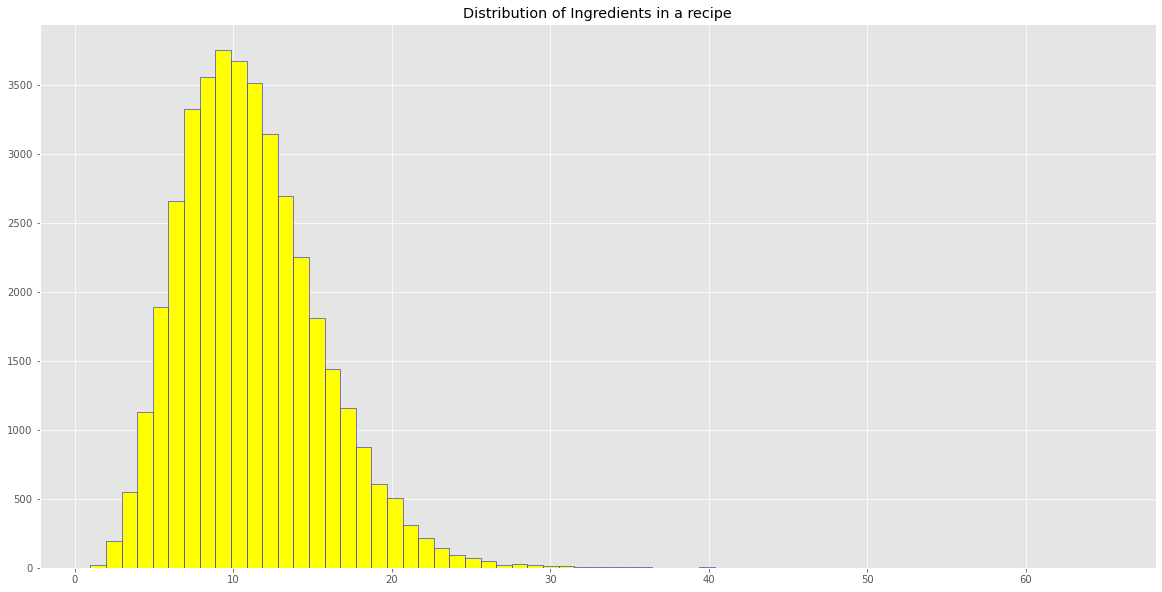

In [7]:
# Distribution of the number of ingredients per recipe
plt.hist(df['ingredients'].str.len(),bins=max(df['ingredients'].str.len()), color='yellow', edgecolor='b')
plt.gcf().set_size_inches(20,10)
plt.title('Distribution of Ingredients in a recipe');

### 3. Data preprocessing

In [8]:
# Data Transformation to split all the ingredients in every recipe
mlb = MultiLabelBinarizer()
binarized = mlb.fit_transform(df['ingredients'])
binarized.shape

(39774, 6714)

In [9]:
# Creating new dataset with the new features
bin_df = pd.DataFrame(binarized, columns=mlb.classes_, index=df.index)
bin_df

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Encoding label variable cuisine 
cuisine_encoder = LabelEncoder()
bin_df['cuisine'] = cuisine_encoder.fit_transform(df['cuisine'])
bin_df['cuisine']

id
0        17
1        13
2         5
3         3
4         9
         ..
49712     7
49713    16
49714     8
49716     7
49717    13
Name: cuisine, Length: 39774, dtype: int64

In [11]:
# Data manipulation for plotting ingredients
ing_df = bin_df.drop('cuisine', axis=1)
ingr_count = ing_df.sum().sort_values(ascending=False).head(20)
ing = ingr_count.sort_values(ascending=True)

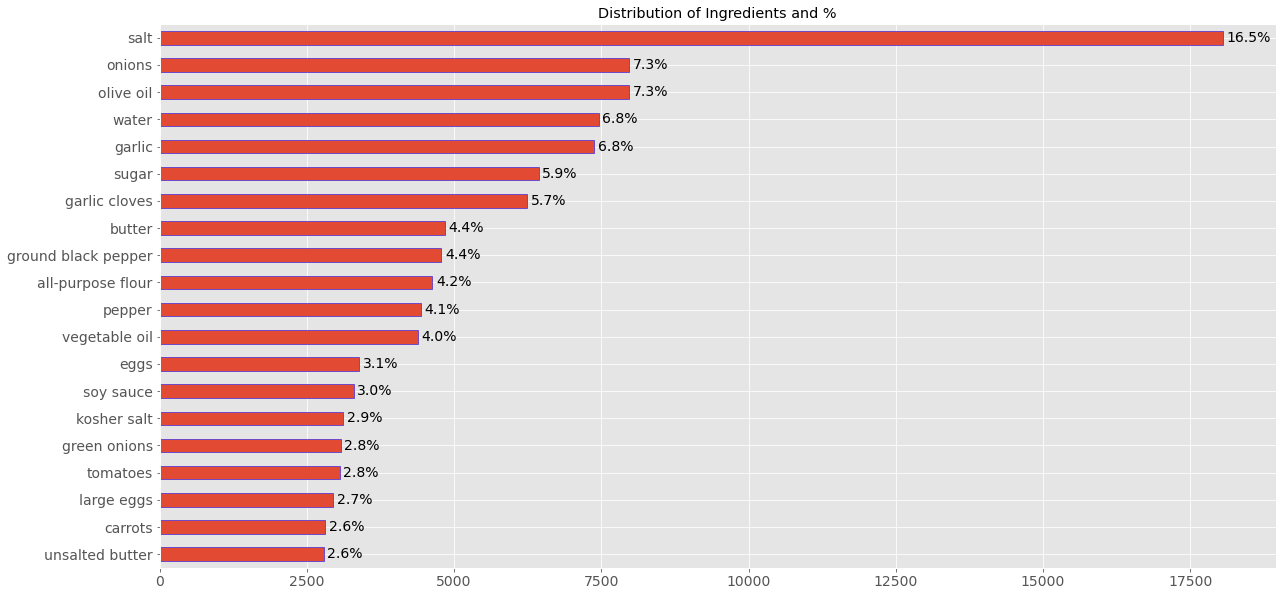

In [12]:
# Plotting ingredients distribution and %
ax = ing.plot(kind='barh', edgecolor='b', fontsize=14, title='Distribution of Ingredients and %', figsize=(20,10))

total_ing = []
for i in ax.patches:
    total_ing.append(i.get_width())

totals_ing = sum(total_ing)
for i in ax.patches:
    ax.text(i.get_width()+60, i.get_y()+.1, str(round((i.get_width()/totals_ing)*100, 1))+'%', fontsize=14)

In [13]:
# Get rid of 'salt' being present in most of the cuisine
ing_df = ing_df[ing_df['salt']!=1]

In [14]:
# Add the columname for cuisine
ing_df['cuisine_name'] = df['cuisine']

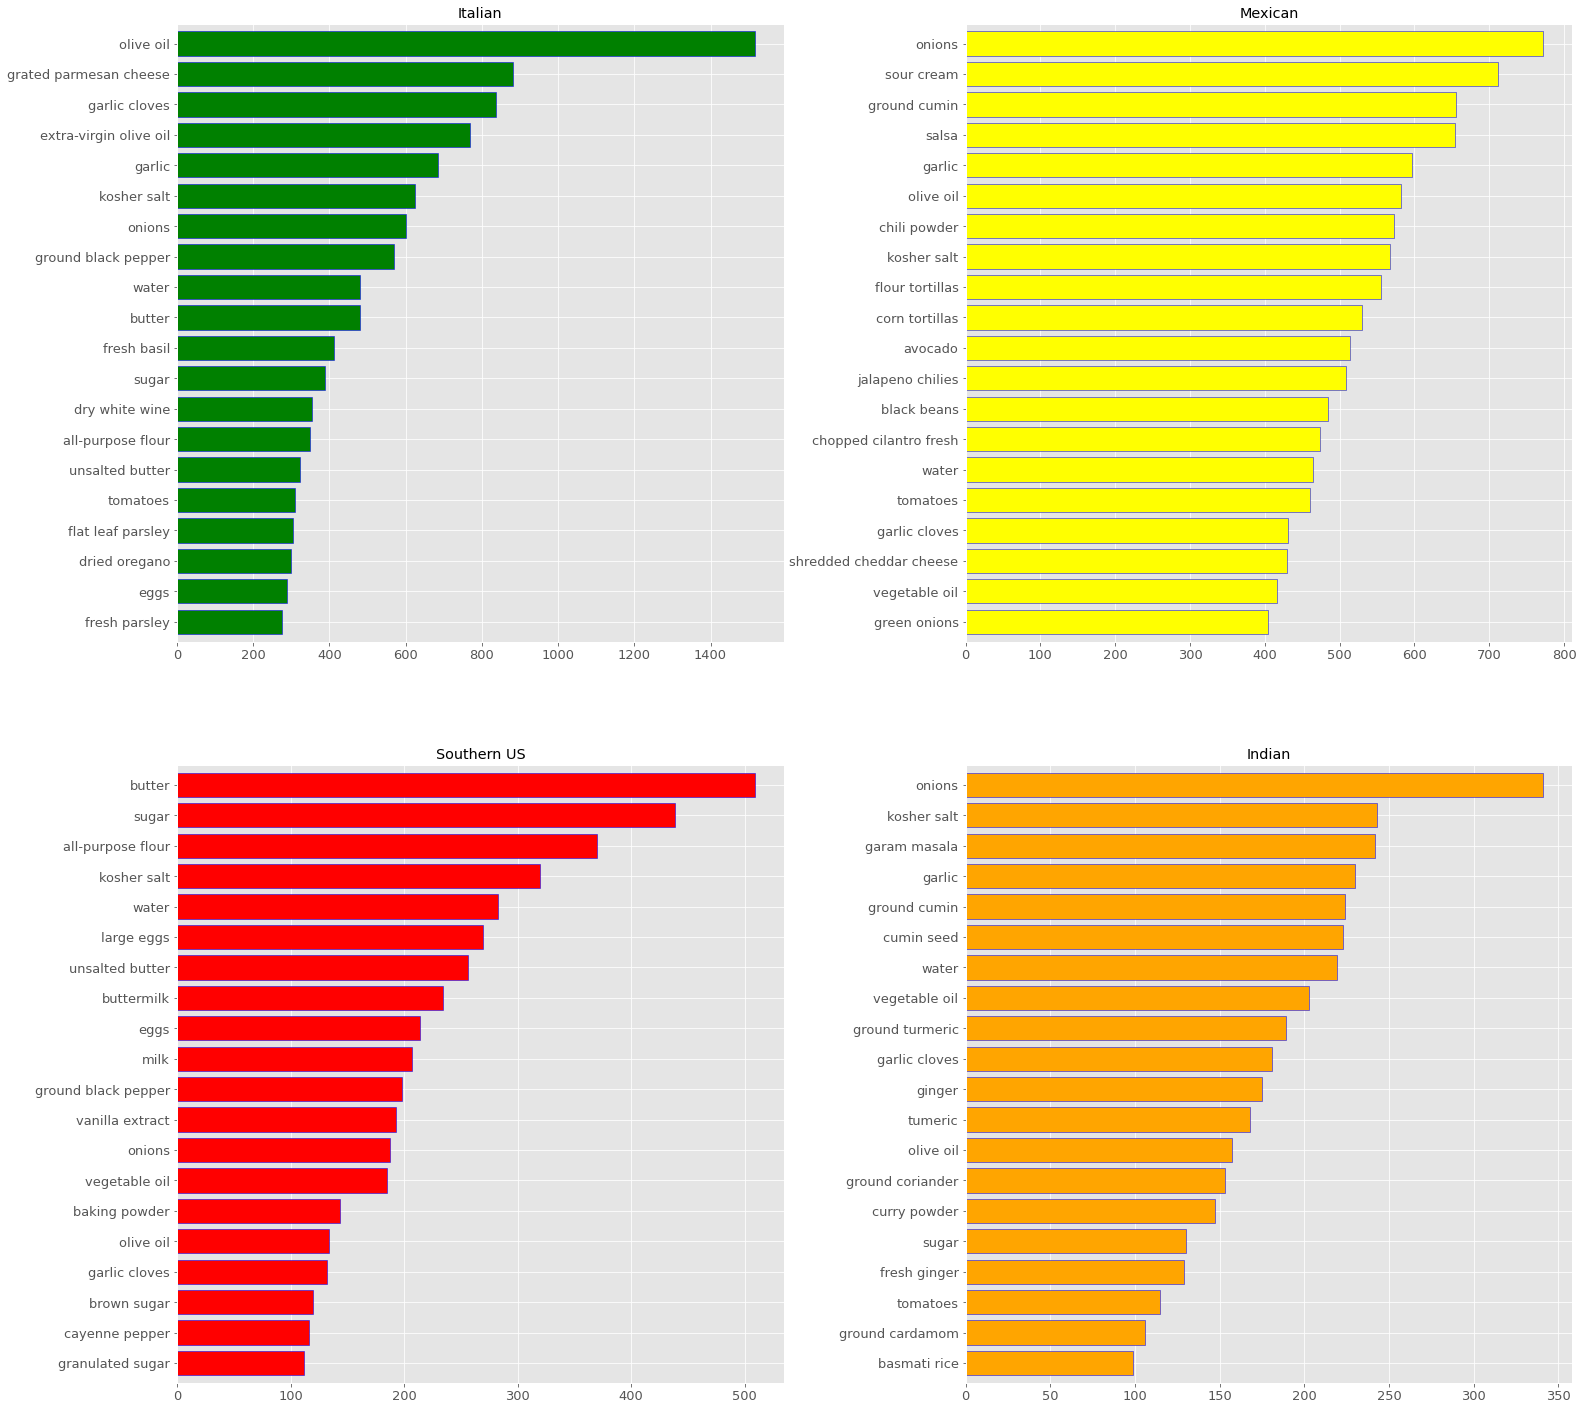

In [15]:
# Manually plotting ingredients per cuisine
fig, ax = plt.subplots(2,2, figsize=(25,25))
ing_ita = ing_df[ing_df['cuisine_name']=='italian'].drop('cuisine_name', axis=1).sum().sort_values(ascending=False)[:20]
ing_ita.sort_values(ascending=True).plot(kind='barh', ax=ax[0,0], width=0.8, fontsize=13, color='green', title='Italian', edgecolor='b')
ing_mex = ing_df[ing_df['cuisine_name']=='mexican'].drop('cuisine_name', axis=1).sum().sort_values(ascending=False)[:20]
ing_mex.sort_values(ascending=True).plot(kind='barh', ax=ax[0,1], width=0.8, fontsize=13, color='yellow', title='Mexican', edgecolor='b')
ing_us = ing_df[ing_df['cuisine_name']=='southern_us'].drop('cuisine_name', axis=1).sum().sort_values(ascending=False)[:20]
ing_us.sort_values(ascending=True).plot(kind='barh', ax=ax[1,0], width=0.8, fontsize=13, color='red', title='Southern US', edgecolor='b')
ing_ind = ing_df[ing_df['cuisine_name']=='indian'].drop('cuisine_name', axis=1).sum().sort_values(ascending=False)[:20]
ing_ind.sort_values(ascending=True).plot(kind='barh', ax=ax[1,1], width=0.8, fontsize=13, color='orange', title='Indian', edgecolor='b')
plt.subplots_adjust(wspace=0.3);

In [16]:
# Manipulation for automatically plotting ingredients per cuisine
list_cuisine = sorted(set([i for i in ing_df['cuisine_name']]))

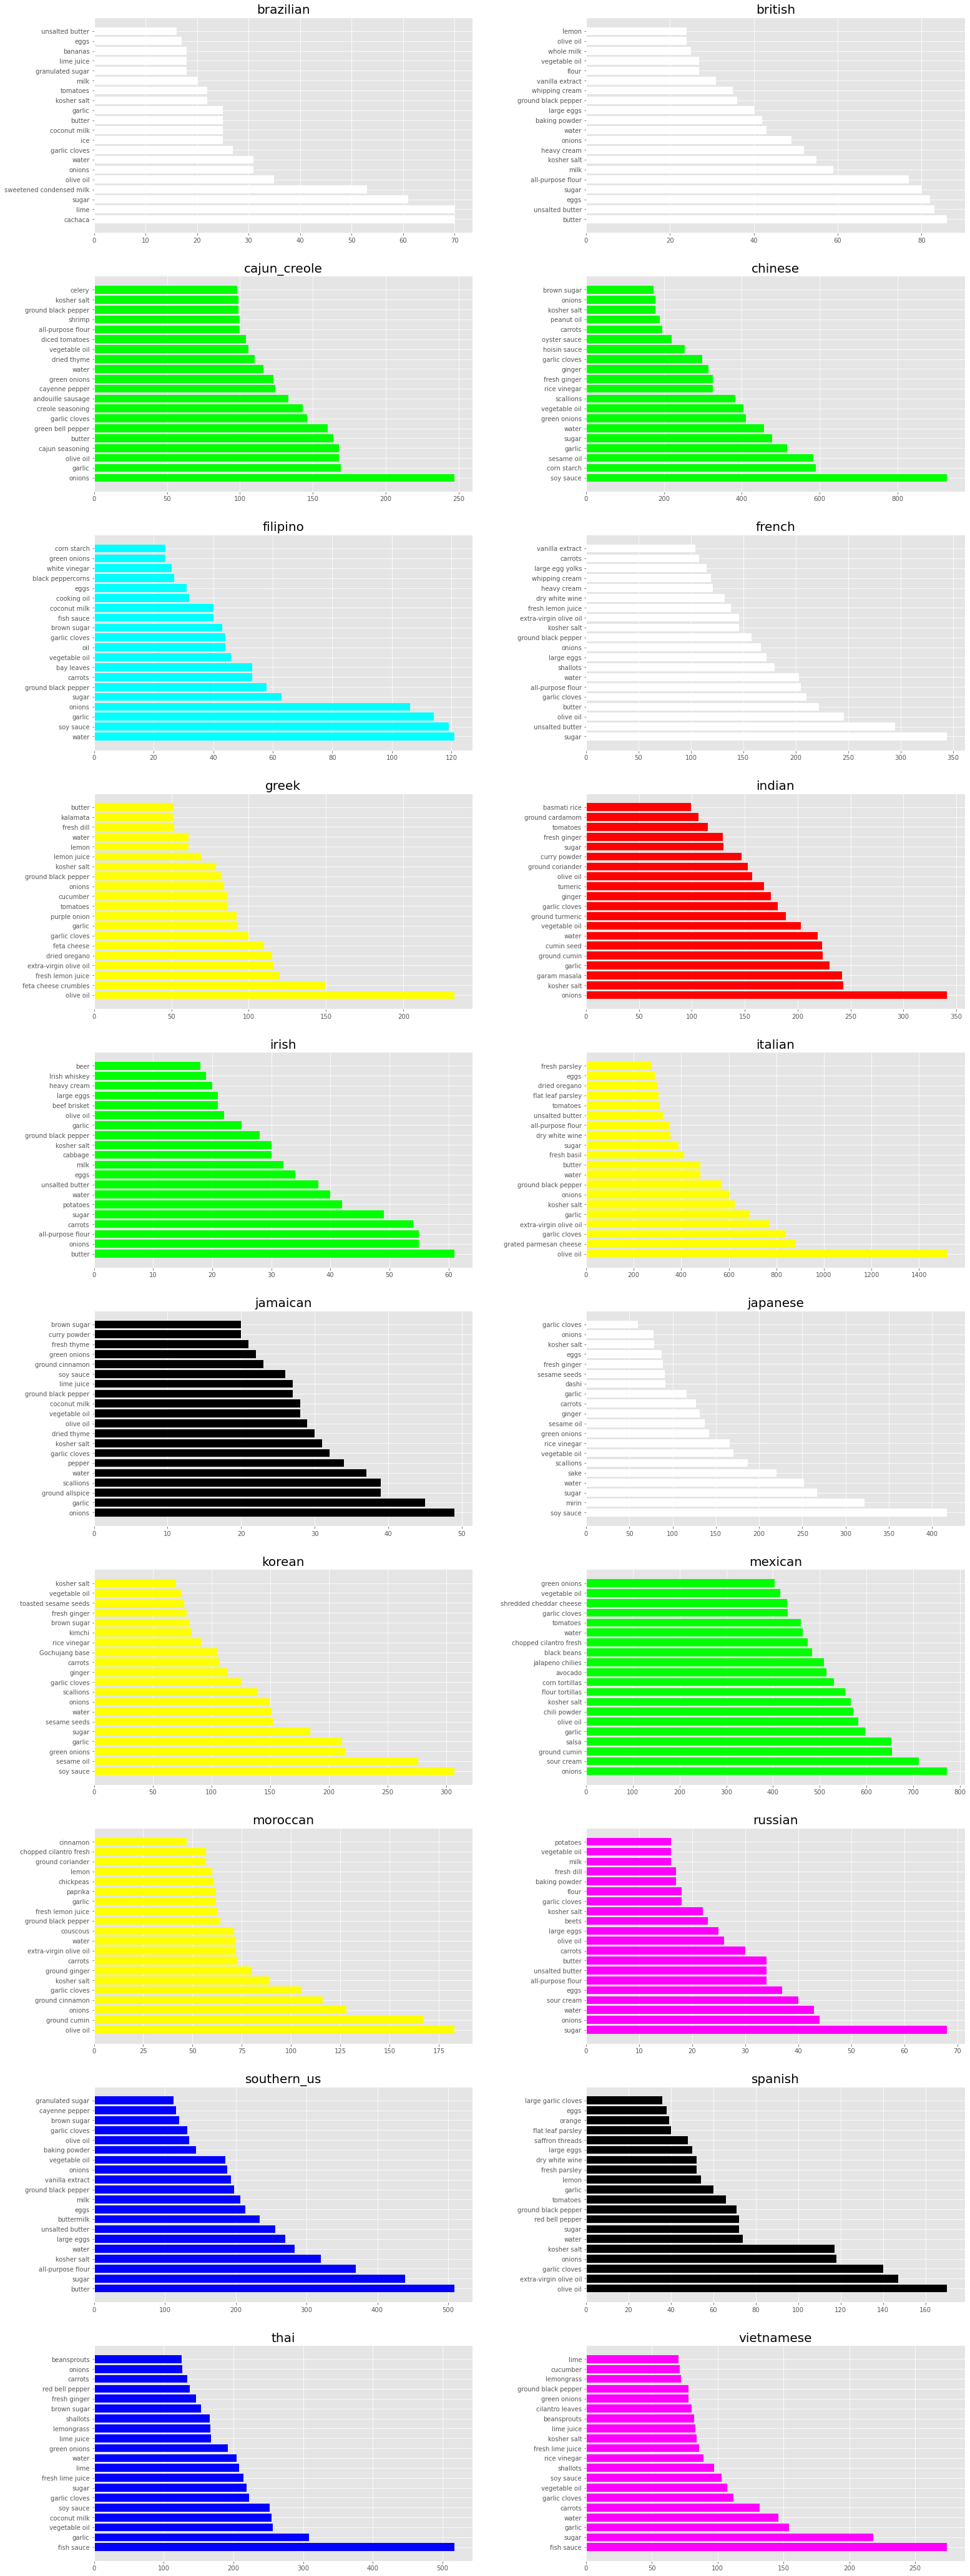

In [17]:
# Plotting all the ingredients per cuisine
fig, ax = plt.subplots(10,2, figsize=(25,75))

plt.subplots_adjust(wspace=0.3)

for j in range(0,10):
    for k in range(0,2):
        cuisine = list_cuisine[j*2+k]
        serie = ing_df[ing_df['cuisine_name']==cuisine].drop('cuisine_name',axis=1).sum().sort_values(ascending=False)[:20]
        dataf = pd.DataFrame(serie, index=serie.index)
        y = dataf[0]
        x = dataf.index
        ax[j,k].set_title(cuisine, fontsize=20)
        ax[j,k].barh(x, y, color=np.random.choice(range(0, 2), size=3));

### 4. Data Preparation for Machine Learning

In [18]:
# Preparing X, y for machine learning model
X = bin_df.drop('cuisine', axis=1)
y = bin_df['cuisine']

In [19]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [20]:
X_train

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
id,,,,,,,,,,,,,,,,,,,,,
6813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Model Building

In [21]:
# Model Building
log_reg = LogisticRegression(max_iter=500)

In [22]:
# log_reg fitting
start_time = time.clock()
log_reg.fit(X_train, y_train)
print('Cross val score Train: ' + str(cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy')))
print('Score on Test data: ' + str(log_reg) + ' ' + str(log_reg.score(X_test, y_test)))
print()
print('Time:', time.clock() - start_time, "seconds")
print()

Cross val score Train: [0.76840306 0.76113849 0.76174193]
Score on Test data: LogisticRegression(max_iter=500) 0.7736323411102172

Time: 693.9209149999999 seconds



In [23]:
# Alternative model
rfc = RandomForestClassifier()

In [24]:
# rfc fitting
start_time = time.clock()
rfc.fit(X_train, y_train)
print('Cross val score Train: ' + str(cross_val_score(rfc, X_train, y_train, cv=3, scoring='accuracy')))
print('Score on Test data: ' + str(rfc) + ' ' + str(rfc.score(X_test, y_test)))
print()
print('Time:', time.clock() - start_time, "seconds")
print()

Cross val score Train: [0.69981899 0.68892688 0.69083778]
Score on Test data: RandomForestClassifier() 0.7174175382139983

Time: 305.0332789999999 seconds



In [26]:
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob = [x[1] for x in y_pred_prob]

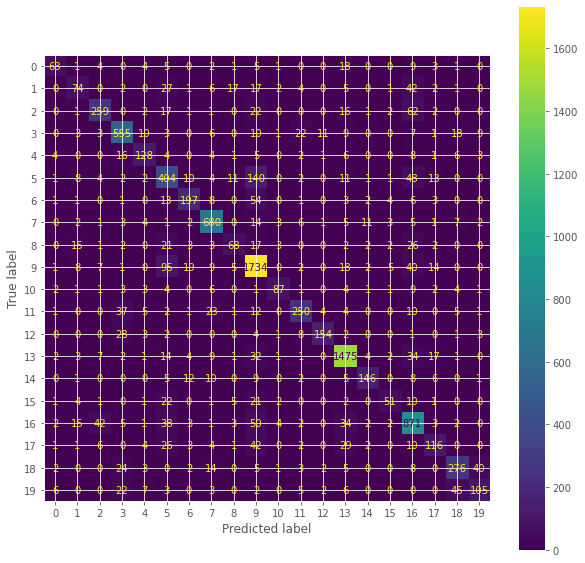

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(log_reg, X_test, y_test, ax=ax);

In [73]:
# Define function for evaluate metrics
def evaluation_metric(model, X_test, y_test, y_pred, y_pred_prob):
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('\n Classification Report: \n\n', classification_report(y_test, y_pred))
    
evaluation_metric(log_reg, X_test, y_test, y_pred, y_pred_prob)

Accuracy Score:  0.7736323411102172

 Classification Report: 

               precision    recall  f1-score   support

           0       0.72      0.54      0.62       117
           1       0.54      0.37      0.44       201
           2       0.77      0.67      0.72       386
           3       0.79      0.83      0.81       668
           4       0.72      0.68      0.70       189
           5       0.57      0.61      0.59       662
           6       0.76      0.67      0.71       294
           7       0.86      0.91      0.88       751
           8       0.60      0.41      0.48       167
           9       0.79      0.88      0.83      1960
          10       0.82      0.66      0.73       131
          11       0.80      0.70      0.75       356
          12       0.88      0.74      0.81       207
          13       0.89      0.92      0.90      1610
          14       0.84      0.71      0.77       205
          15       0.69      0.42      0.52       122
          16     

### 6. Improve the model

In [62]:
# Define the parameters grid for LassoCV
param_grid = {'C':[0.5,1],
              'penalty':['l1','l2']
             }

In [63]:
# Run grid search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(log_reg, param_grid, verbose = 3, n_jobs = -1) 

In [64]:
# Fit the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/dser/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.76600738        nan 0.76768354]
  category=UserWarning


GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'penalty': ['l1', 'l2']}, verbose=3)

In [65]:
grid.best_estimator_

LogisticRegression(C=1, max_iter=1000)

In [66]:
# Model Building
log_reg = LogisticRegression(C=1, max_iter=1000)

In [67]:
# log_reg refitting
start_time = time.clock()
log_reg.fit(X_train, y_train)
print('Cross val score Train: ' + str(cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy')))
print('Score on Test data: ' + str(log_reg) + ' ' + str(log_reg.score(X_test, y_test)))
print()
print('Time:', time.clock() - start_time, "seconds")
print()

Cross val score Train: [0.76840306 0.76113849 0.76174193]
Score on Test data: LogisticRegression(C=1, max_iter=1000) 0.7736323411102172

Time: 739.042097 seconds



In [71]:
# Save the model 
filename = 'final_model_recipes.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [72]:
# Load the model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

LogisticRegression(C=1, max_iter=1000)